In [127]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from warnings import filterwarnings
import matplotlib.pyplot as plt44
import seaborn as sns
sns.set()
filterwarnings("ignore")

In [128]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


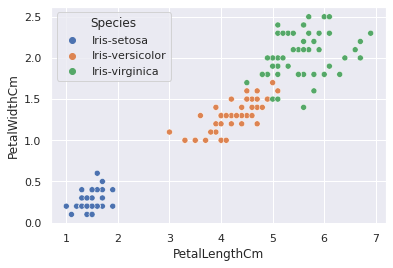

In [129]:
sns.scatterplot(data["PetalLengthCm"], data["PetalWidthCm"], hue="Species", data=data);
# sns.pairplot(data)

In [130]:
data.drop("Id", axis=1, inplace=True)

In [133]:
binary = LabelBinarizer()
binary.fit(data["Species"])
data_2 = binary.fit_transform(data["Species"])
# data.drop("Species", axis=1, inplace=True)
# data = pd.concat([data, data_2], axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
X = data.iloc[:, :4]
y = data.iloc[:, -1:]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
model_logreg = LogisticRegression()
model_svc = SVC()
model_rf = RandomForestClassifier()

voting = VotingClassifier(
    estimators=[("model_logreg", model_logreg), ("model_svc", model_svc), ("model_rf", model_rf)],
    voting="soft" # hard
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('model_logreg', LogisticRegression()),
                             ('model_svc', SVC()),
                             ('model_rf', RandomForestClassifier())],
                 voting='soft')

In [20]:
for x in model_logreg, model_rf, model_svc:
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)
    print(x.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9666666666666667
RandomForestClassifier 0.9666666666666667
SVC 0.9666666666666667


In [21]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [22]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [23]:
mean_squared_error(y_test, y_pred)

0.03333333333333333

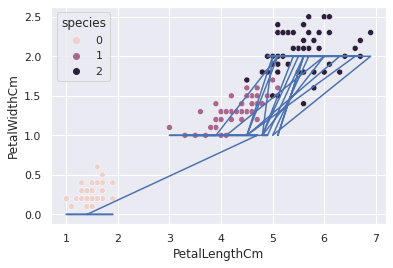

In [21]:
sns.scatterplot(data["PetalLengthCm"], data["PetalWidthCm"], hue="species", data=data);
plt.plot(data["PetalLengthCm"], model.predict(X))